1. Most Frequent Genre of movies released on Netflix
2. Highest vote Genres
3. Movie with highest popularity and what is genre?
4. Movie with lowest popularity and what is genre?
5. Which year has most filmed movies?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("data/mymoviedb.csv", lineterminator= '\n')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df['Genre'].head()

In [29]:
df.duplicated().sum()

0

In [42]:
df['Vote_Count'] = df['Vote_Count'].astype('Int64')  # Allows nulls too

df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   Int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
        9837 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(5)
memory usage: 701.4+ KB


In [45]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9826.0,9826.000000
mean,2012-01-08 04:46:10.977917952,40.320570,1392.943721,6.439467
min,1975-01-10 00:00:00,7.100000,0.0,0.000000
25%,2003-11-26 00:00:00,16.127500,146.0,5.900000
50%,2013-05-29 00:00:00,21.191000,444.0,6.500000
75%,2018-11-21 00:00:00,35.174500,1376.0,7.100000
max,2074-12-20 00:00:00,5083.954000,31077.0,10.000000
std,NaN,108.874308,2611.303856,1.129797


### Exploration Summary:
#### - Changed data types for release date, vote_count and vote_average columns *
#### - We do not have any duplicate values
#### - Columns like Oveview, Poster Url, language won't be useful based on what we are looking for so we can drop those columns for now
#### - Noticeable outlier in Popularitu column
#### - Genre Column has comma separted values and spaces in between values that need to be casted in a separate category for each genre.

In [46]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [48]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [54]:
# Re-load the original date column from the CSV
df['Release_Date'] = pd.read_csv("data/mymoviedb.csv")['Release_Date']


In [57]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format="%m/%d/%y", errors='coerce')


In [58]:
print(df['Release_Date'].dtype)
df[['Title', 'Release_Date']].head()


datetime64[ns]


,Title,Release_Date
0,Spider-Man: No Way Home,2021-12-15
1,The Batman,2022-03-01
2,No Exit,2022-02-25
3,Encanto,2021-11-24
4,The King's Man,2021-12-22


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

In [62]:
df['Release_Date'] = df['Release_Date'].astype('Int64')


In [63]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Dropping Unneccessary Columns; Overview, Poster URL, Original language

In [68]:
cols = ['Overview', 'Original_Language', 'Poster_Url\r']

In [69]:
df.drop(cols, axis= 1, inplace = True)

In [70]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Adding Labels for Vote_Average column, and categorizing column

In [83]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

In [86]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [87]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# Separating Genres and categorizing each one of them separately

In [88]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Casting columns into category

In [89]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  Int64   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: Int64(2), category(2), float64(1), object(1)
memory usage: 899.3+ KB


In [91]:
df.nunique()

Release_Date      96
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [92]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [93]:
sns.set_style('whitegrid')

### 1. Most Frequent Genre of movies released on Netflix

In [94]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

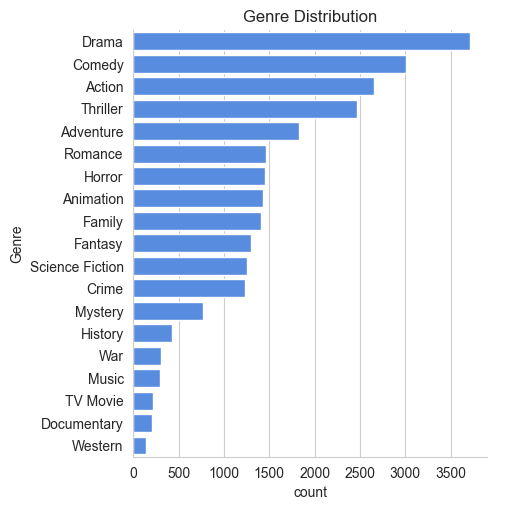

In [95]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre Distribution')

plt.show

### 2. Highest vote in Vote_Average column


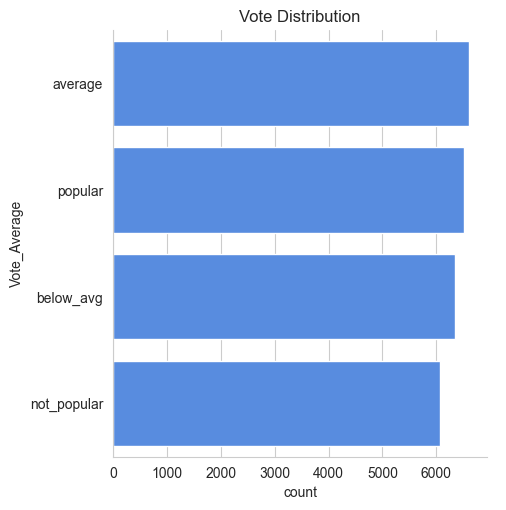

In [96]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Vote Distribution')
plt.show()

### 3. Movie with highest popularity and what is genre?


In [97]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### 4. Movie with lowest popularity and what is genre?


In [99]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


### 5. Which year has most released movies?

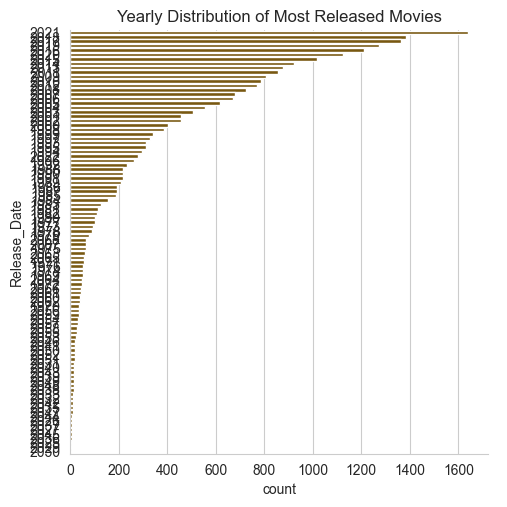

In [107]:
sns.catplot(y= 'Release_Date', data = df, kind = 'count',
            order = df['Release_Date'].value_counts().index,
            color = '#895f00')
plt.title('Yearly Distribution of Most Released Movies')
plt.show()

In [108]:
year_counts = df['Release_Date'].value_counts().sort_index()


In [109]:
year_counts = df.groupby(df['Release_Date'].astype(str).str[:4]).size().sort_index()


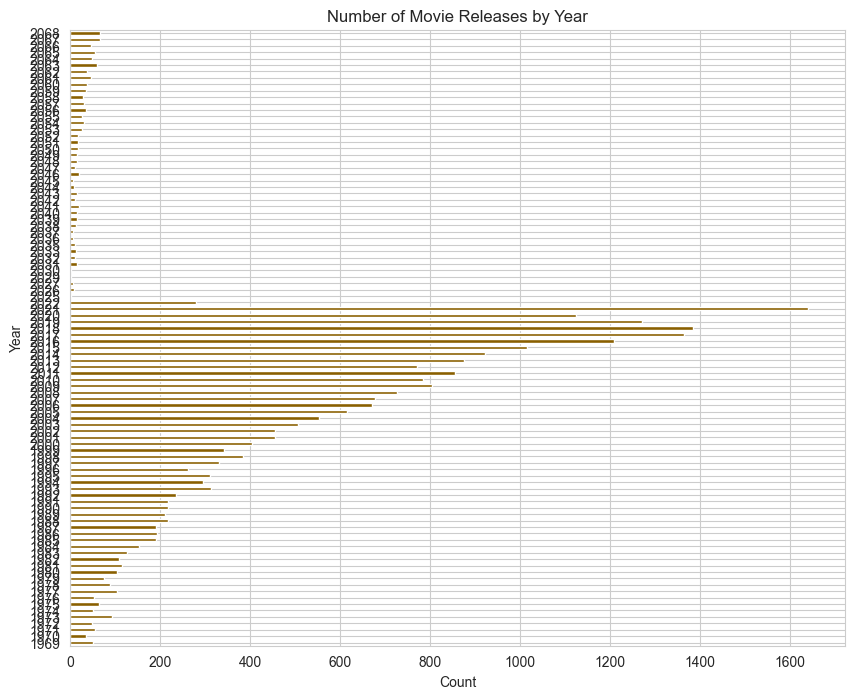

In [110]:

year_counts.plot(kind='barh', figsize=(10, 8), color='#895f00')

plt.title('Number of Movie Releases by Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()
